In [55]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

## Linear Regression - Predicting the age of Abalones


The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

#### The features used are:
- Length (Longest shell measurement)
- Diameter (Perpendicular to length)
- Height (With meat in shell)
- Wet Weight (Whole Abalone)
- Shucked_Weight (Weight of Meat)
- Viscera_Weight (Gut Weight (after bleeding))
- Shell_Weight (After Being Dried)

#### The dependant variable:

- Rings (Every year is given by 1.5 rings)


##### Dataset used: 

https://archive.ics.uci.edu/ml/datasets/abalone

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 



In [3]:
# Import & Add columns
colnames=['Sex', 'Length', 'Diameter', 'Height','Wet_Weight','Shucked_Weight','Viscera_Weight','Shell_Weight','Rings']
data = pd.read_csv("abalone.csv", names=colnames, header=None)

# Data Visualization 

### 1D - Understanding the distribution of the variables



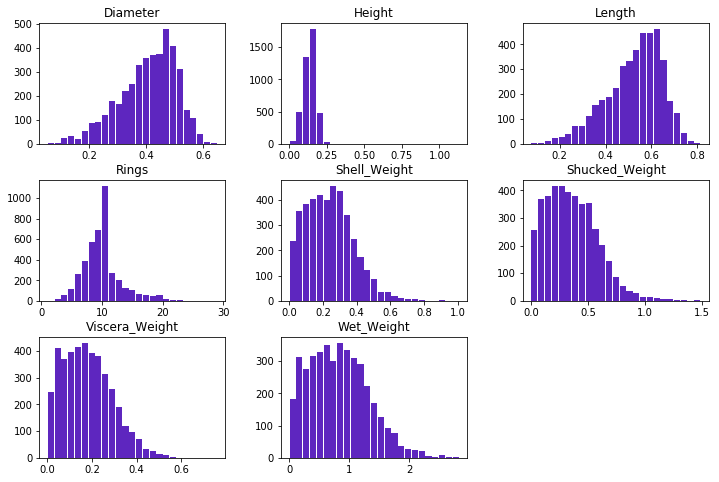

In [4]:
figure = data.hist( bins=25, grid=False, figsize=(12,8), color='#5e26bf', zorder=2, rwidth=0.9)

### PairPlots - Understanding the relationship between all variables

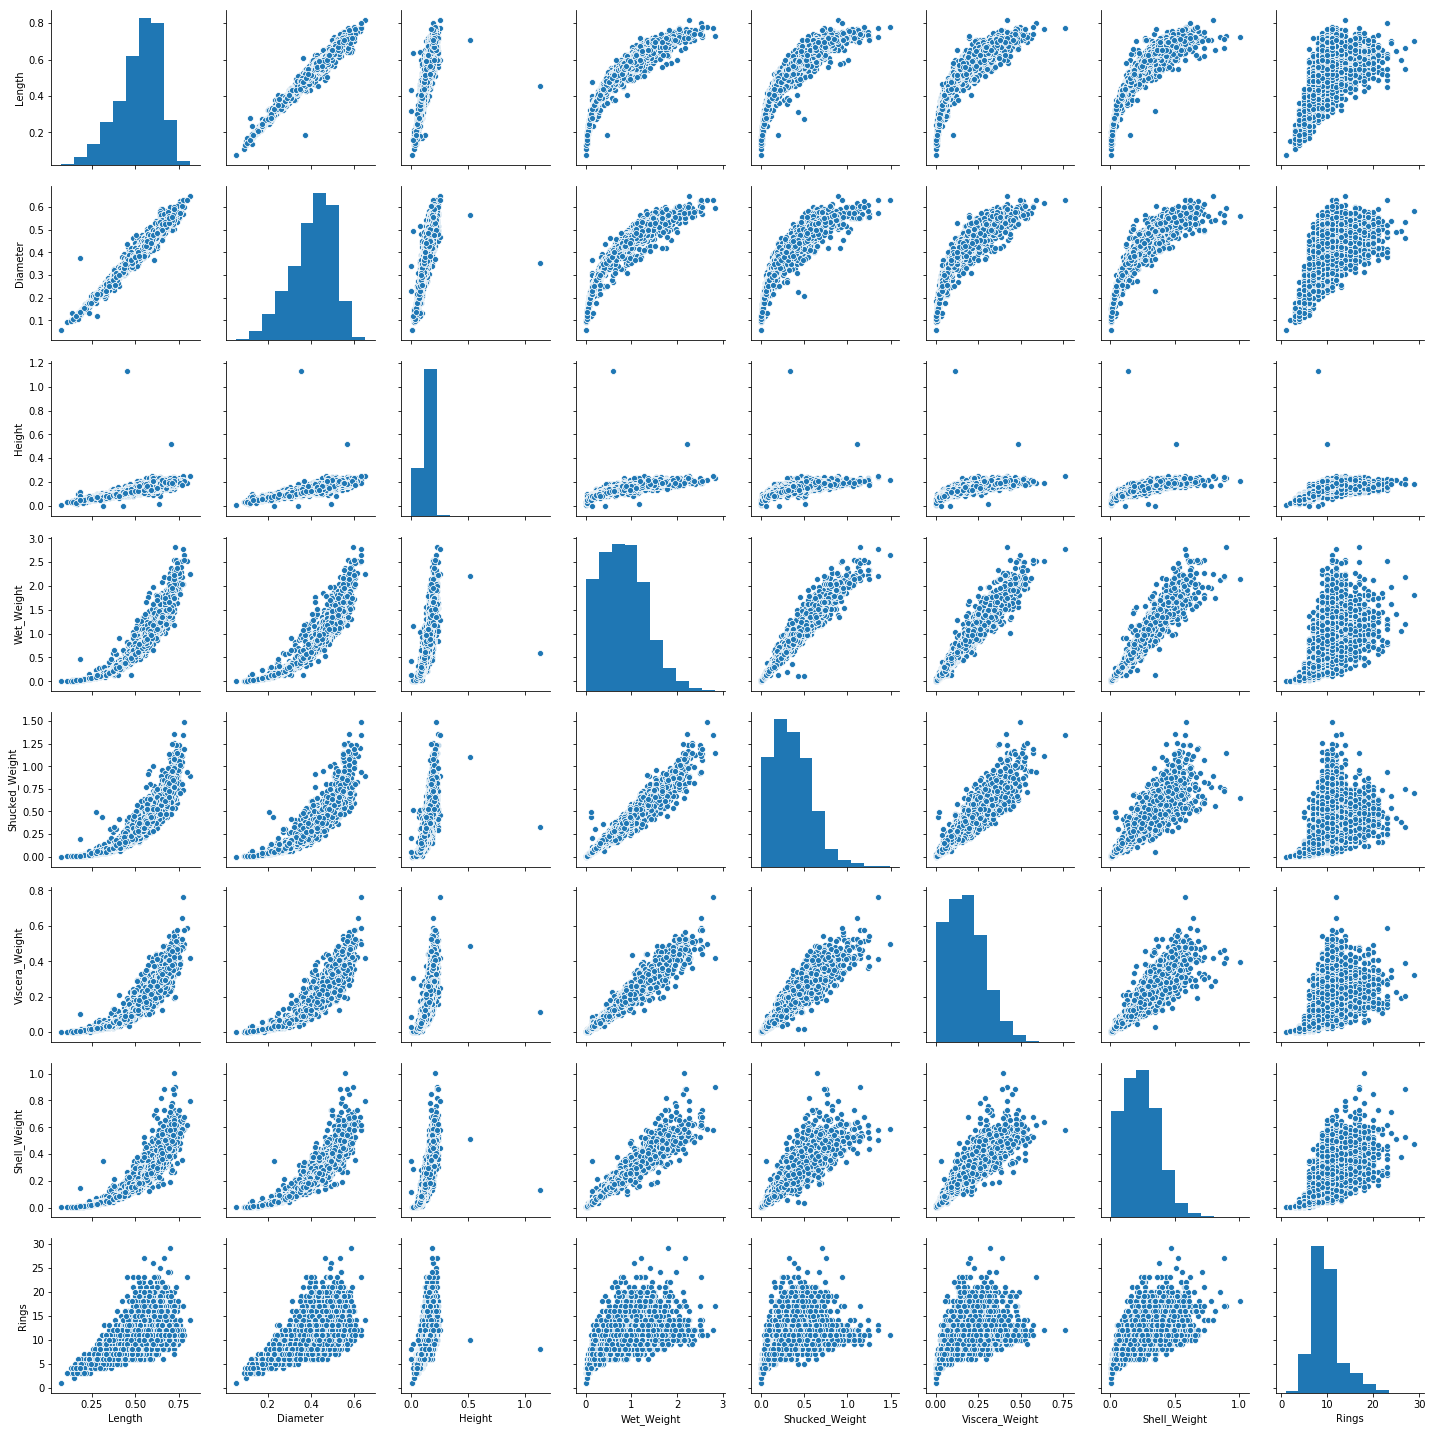

In [9]:
sns.pairplot(data);


### Summary Statistics Table 

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Wet_Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


## Correlation Matrix

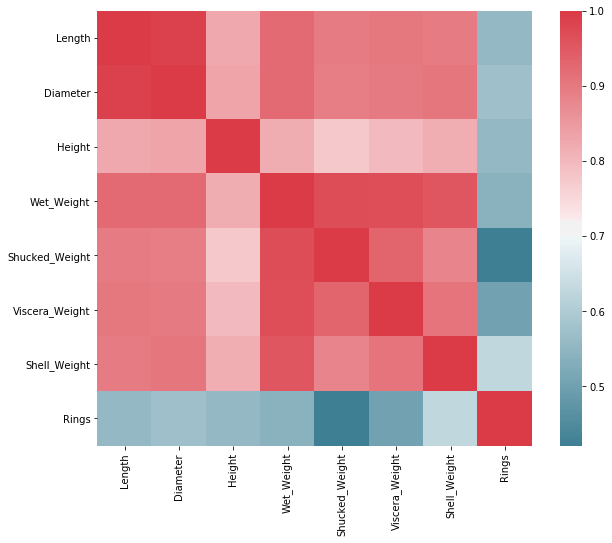

In [28]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
b = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Visualizing Table

In [31]:
data.head()

,Sex,Length,Diameter,Height,Wet_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Preparing the data

In [37]:
X = data[['Length', 'Diameter', 'Height','Wet_Weight','Shucked_Weight','Viscera_Weight','Shell_Weight']].values
y = data['Rings'].values
print("X Shape:", X.shape, "\ny Shape:", y.shape)

X Shape: (4177, 7) 
y Shape: (4177,)


In [41]:
# Train & Test split (20% to be tested)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Object
regressor = LinearRegression()

# Train parameters
fit = regressor.fit(X_train, y_train)

In [54]:
cols = ['Length', 'Diameter', 'Height', 'Wet_Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight']

results = pd.DataFrame(zip(cols, regressor.coef_), columns = ['Features', 'Estimated Coefficients'])
results.transpose()

,0,1,2,3,4,5,6
Features,Length,Diameter,Height,Wet_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
Estimated Coefficients,-1.2683,13.4359,9.16578,9.6629,-20.6264,-9.94799,8.1526


In [64]:
y_pred = regressor.predict(X_test)  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared',regressor.score(X_test, y_test) )


Mean Absolute Error: 1.6151862192084552
Mean Squared Error: 5.103381714160204
Root Mean Squared Error: 2.259066558151885
R squared 0.5300888107050659
